<a href="https://colab.research.google.com/github/abi13-ehub/Fin-Prediction-Projects/blob/main/Netflix_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# install the dependencies 
import numpy as np
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [19]:
# load the data 
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX (1).csv


In [20]:
# store the data into a dataframe 
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900


In [6]:
# get the number of trading days
df.shape

(1009, 7)

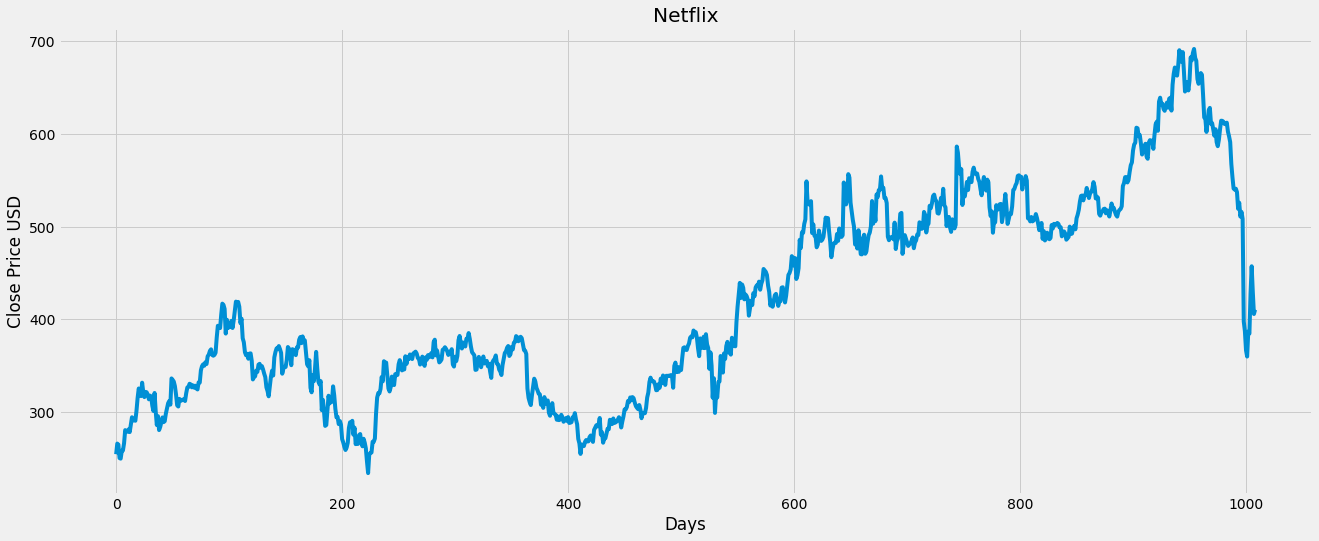

In [21]:
# visualize the close price data 
plt.figure(figsize=(20,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.show()

In [22]:
# Get the close price 
df = df['Close']
df.head(4)

0    254.259995
1    265.720001
2    264.559998
3    250.100006
Name: Close, dtype: float64

In [25]:
# create a variable to predict the 'x' days out into the future 
future_days = 25 
df = df.reset_index()
# create a new column(target) shifted 'x' days up
df['Prediction'] = df['Close'].shift(-future_days)
df.tail(4)

,index,Close,Prediction
1005,1005,457.130005,NaN
1006,1006,429.480011,NaN
1007,1007,405.600006,NaN
1008,1008,410.170013,NaN


In [26]:
# create the feature  dataset (X) and convert it to numpy array and remove the last 'x' rows/days 
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[  0.       254.259995]
 [  1.       265.720001]
 [  2.       264.559998]
 ...
 [981.       610.710022]
 [982.       610.539978]
 [983.       612.090027]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
# create the target data set (Y) and convert it to a numpy array and get all the target values except the last X rows 
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

In [28]:
# split the data into 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(X , Y , test_size =0.3)


In [29]:
# create the models
# create the decision tree regressor model 
tree = DecisionTreeRegressor().fit(x_train,y_train)
# create the linear regression model 
lr = LinearRegression().fit(x_train,y_train)


In [30]:
# get the last X rows of the feature dataset 
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[959.      , 658.289978],
       [960.      , 665.640015],
       [961.      , 663.840027],
       [962.      , 641.900024],
       [963.      , 617.77002 ],
       [964.      , 616.469971],
       [965.      , 602.130005],
       [966.      , 612.690002],
       [967.      , 625.580017],
       [968.      , 628.080017],
       [969.      , 611.      ],
       [970.      , 611.659973],
       [971.      , 604.559998],
       [972.      , 597.98999 ],
       [973.      , 605.039978],
       [974.      , 591.059998],
       [975.      , 586.72998 ],
       [976.      , 593.73999 ],
       [977.      , 604.919983],
       [978.      , 614.23999 ],
       [979.      , 614.090027],
       [980.      , 613.119995],
       [981.      , 610.710022],
       [982.      , 610.539978],
       [983.      , 612.090027]])

In [31]:
# show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction )

[612.090027 591.150024 591.150024 591.150024 553.289978 541.059998
 539.849976 540.840027 553.289978 525.690002 525.690002 510.799988
 515.859985 508.25     397.5      387.149994 366.420013 359.700012
 386.700012 457.130005 457.130005 457.130005 410.170013 410.170013
 410.170013]

[631.89107716 637.05219303 635.90344883 620.86614406 604.31861392
 603.51462781 593.7183109  601.09301618 610.07450259 611.89103144
 600.20517452 600.75282018 595.94920331 591.51105184 596.46525382
 586.91718337 584.0237297  588.95036285 596.75261755 603.27222534
 603.26133889 602.6849326  601.11554256 601.09080824 602.25225059]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


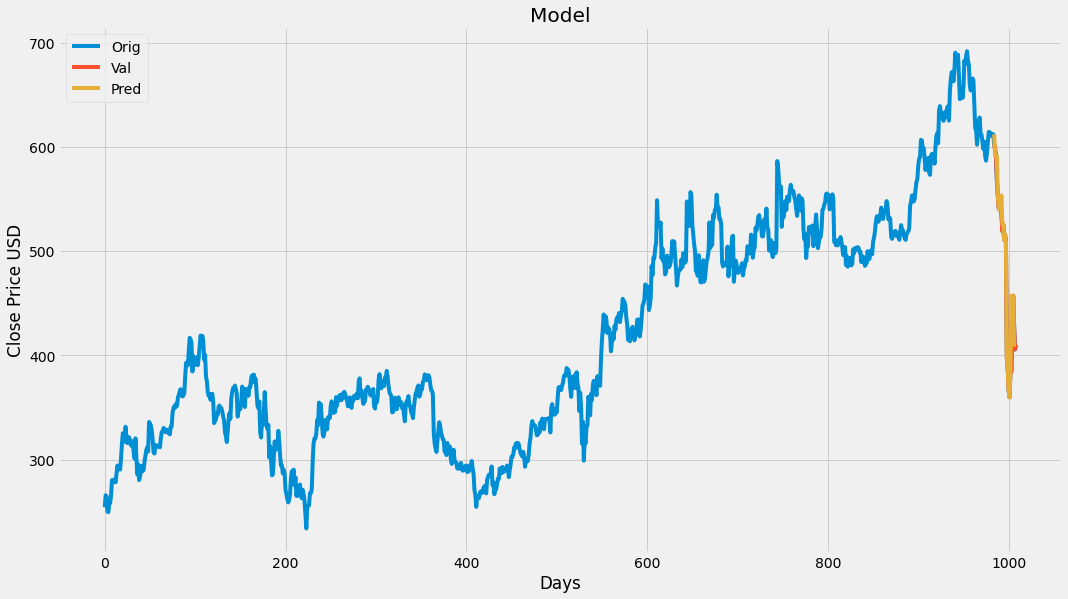

In [36]:
# visualize the data 

predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions']= predictions
plt.figure(figsize=(16, 9))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'],loc = 'upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


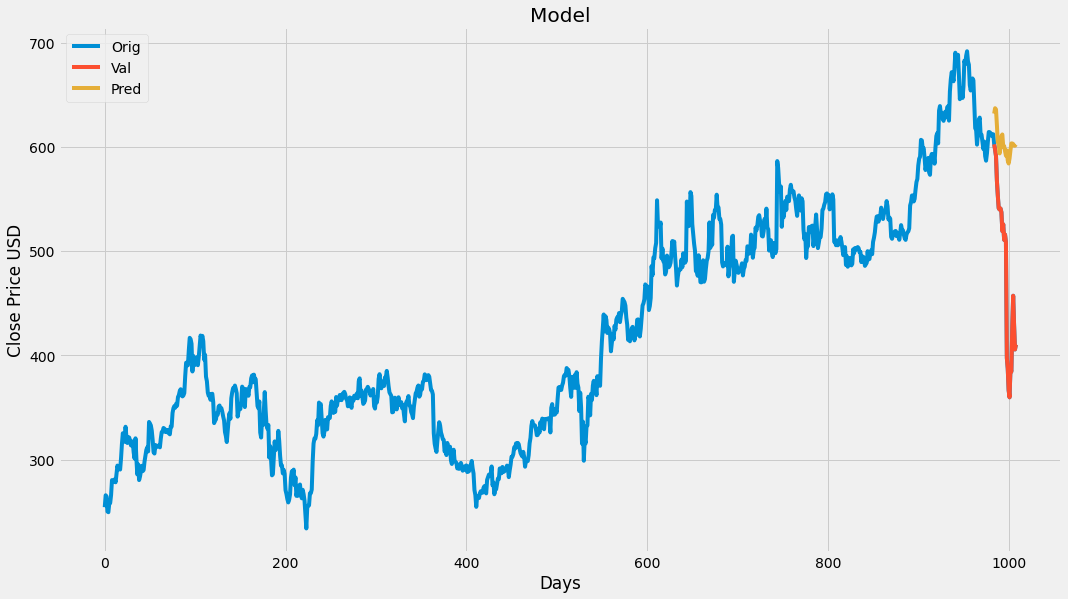

In [37]:

predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions']= predictions
plt.figure(figsize=(16, 9))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'],loc = 'upper left')
plt.show()